<a href="https://colab.research.google.com/github/CHINMAYI-23/Almabetter-Projects/blob/main/CardioVascular_RiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Cardiovascular Risk Prediction

# Project Type : Classification

#Contribution : Individual

#Github link: https://github.com/CHINMAYI-23/Almabetter-Projects

# Business Context

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Business Objective:

The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD)

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading the data
df=pd.read_csv('/content/data_cardiovascular_risk.csv')

# Data Inspection

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Variables Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient
Behavioral:

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

# Handling Missing Values

In [7]:
#Check for null/missing values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are null values present in our dataset especially in the columns such as education, cigsPerDay, BPMeds, totchol, BMI, heartrate, glucose

In [8]:
#Drop the id column
df.drop('id', axis=1, inplace=True)

In [9]:
#Check for the duplicates
len(df[df.duplicated()])

0

There are no duplicates in the dataset

In [10]:
#Statistical description of data
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
#Check for unique values
df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [12]:
#Filling null values of education column
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [13]:
#Value_counts() w.r.t BPMeds
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [14]:
df.isna().sum()[df.isna().sum()>0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [15]:
def fill_mode(df, columns):
  for column in columns:
    df[column]=df[column].fillna(df[column].mode()[0])

In [16]:
#Applying the function to fill null values of the columns
fill_mode(df = df, columns = ['education','BPMeds'])

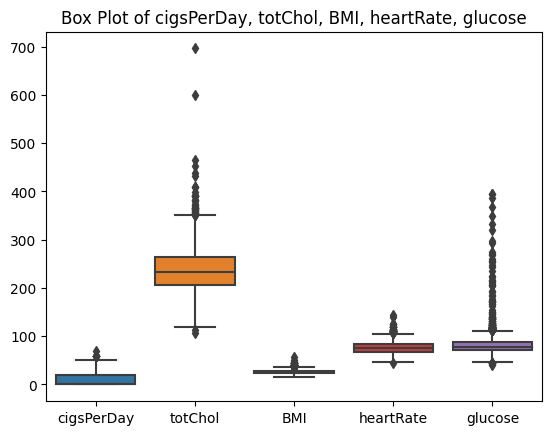

In [17]:
#Distribution
sns.boxplot(data=df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]).set(title='Box Plot of cigsPerDay, totChol, BMI, heartRate, glucose')
plt.show()

In [18]:
#Creating function to fill null values since median works well with outliers
def fill_median(df, columns):
  for column in columns:
    df[column]=df[column].fillna(df[column].median())

In [19]:
#Applying the function to fill null values of the columns
fill_median(df = df, columns = ['cigsPerDay','totChol', 'BMI', 'heartRate', 'glucose'])

In [20]:
#After treating them check for the null values again
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

There are no null values in the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [22]:
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [23]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [24]:
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [25]:
df['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

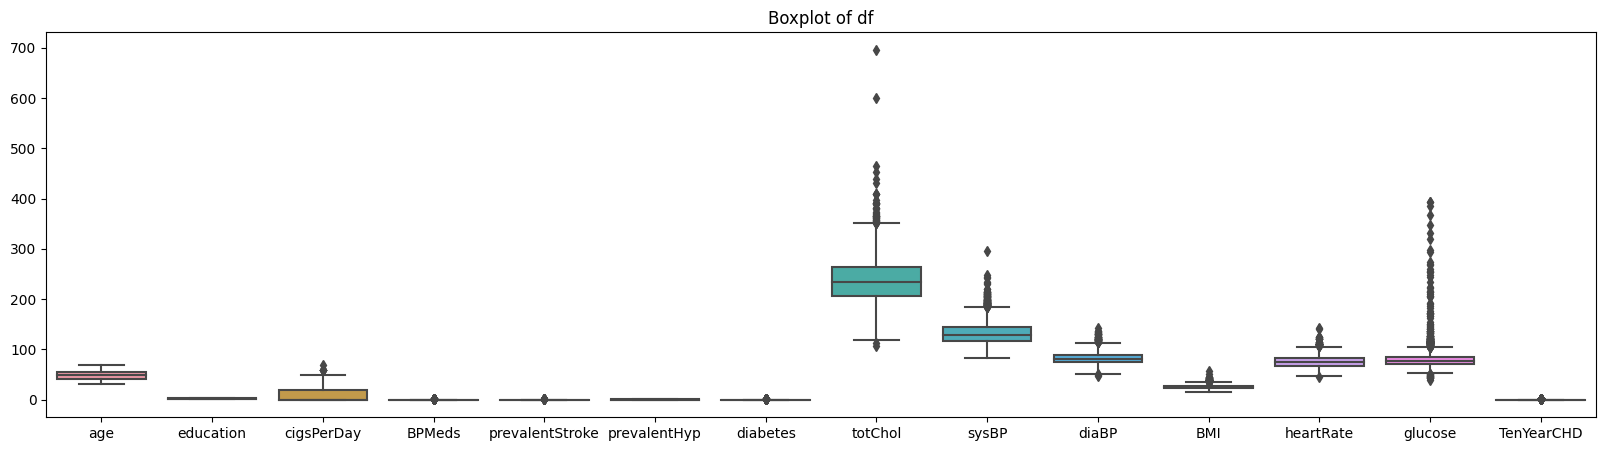

In [26]:
#Boxplot
plt.figure(figsize=(20,5))
sns.boxplot(data=df).set(title='Boxplot of df')
plt.show()

# EXPLORATORY DATA ANALYSIS (EDA)

In [27]:
#Separate and make a new list of categorical and numerical features columns
categorical_col = ['sex', 'education', 'BPMeds', 'is_smoking', 'prevalentStroke','prevalentHyp','diabetes']
numerical_col = ['age', 'cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [28]:
def count_plot(columns):
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(10,50))

  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df, x = column)


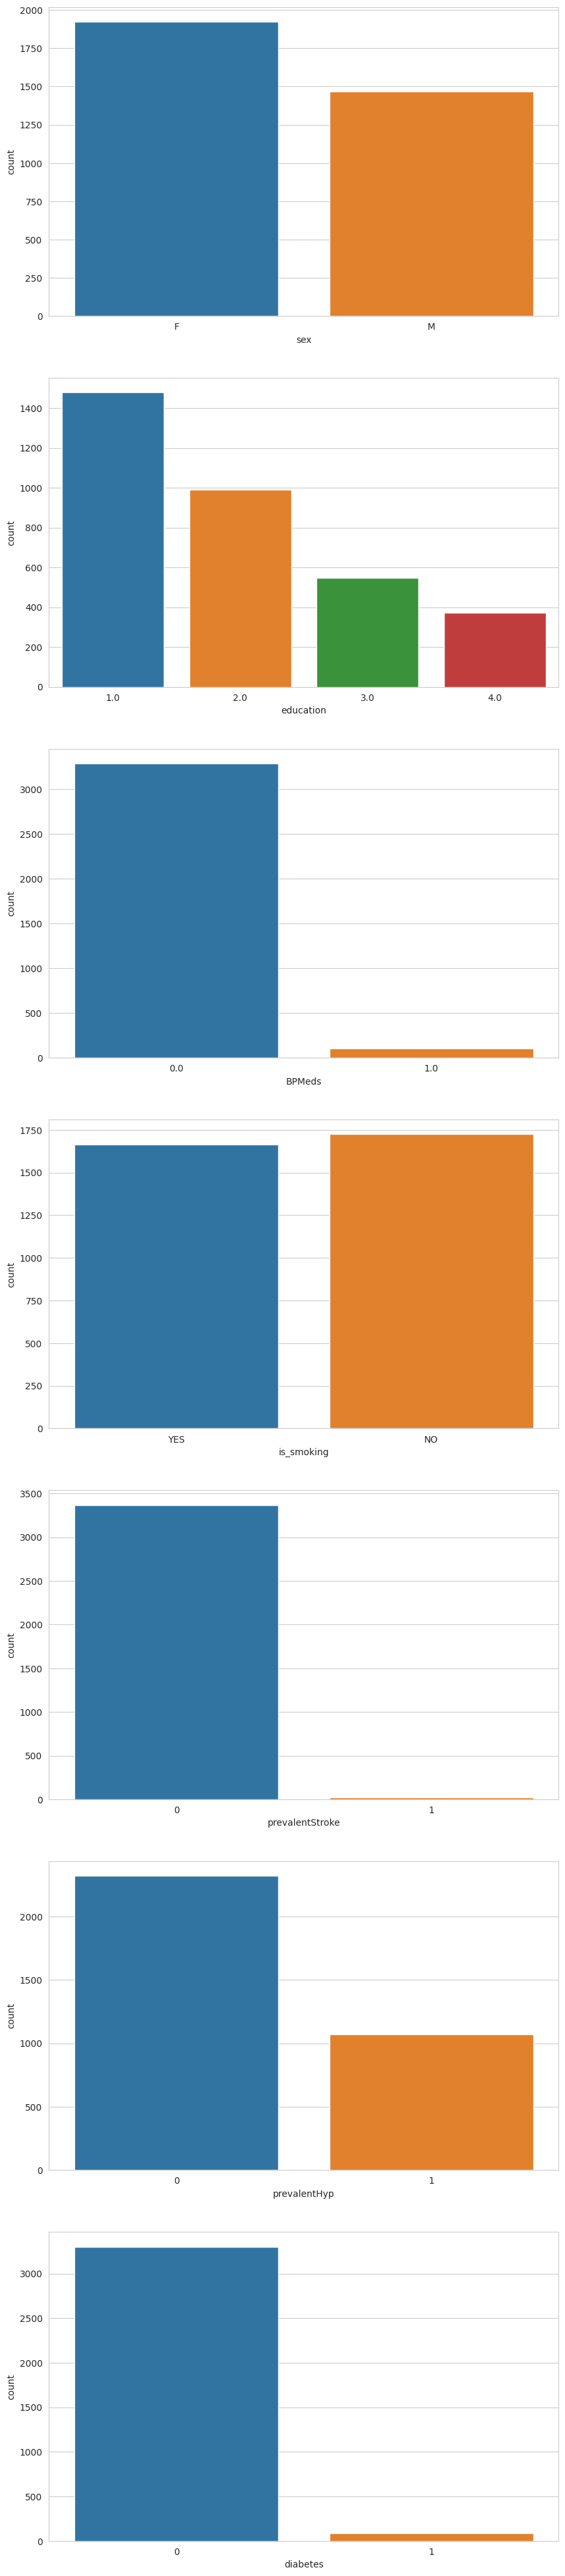

In [29]:
count_plot(categorical_col)

# Observations:

*   More than 3000 people do not have diabetes
*   Only around 1000 ppl are hypertensive in nature


*   Very less people suffered from the stroke
*   Very less people comes under BP medication(>3000)



*   Females proportion is more as compared to male
*   With respect to education level, >1000 people have level 1 education and around 400 people have level 4 education

*   Non-smokers are more as compared to smokers










In [30]:
#Correlation
df.corr()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.170614,1.000000,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.039303,-0.051388
cigsPerDay,-0.191465,0.014078,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374,0.068020
BPMeds,0.122114,-0.019880,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356,0.087349
prevalentStroke,0.059038,-0.031820,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalentHyp,0.308826,-0.081925,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.107875,-0.051895,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,0.271961,-0.021221,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605
sysBP,0.404845,-0.132202,-0.100348,0.260384,0.057568,0.699285,0.124011,0.197848,1.000000,0.781908,0.331730,0.178135,0.137832,0.212703
diaBP,0.221896,-0.060774,-0.068320,0.198780,0.047235,0.612897,0.061165,0.153825,0.781908,1.000000,0.379684,0.174908,0.069097,0.135979


<Axes: >

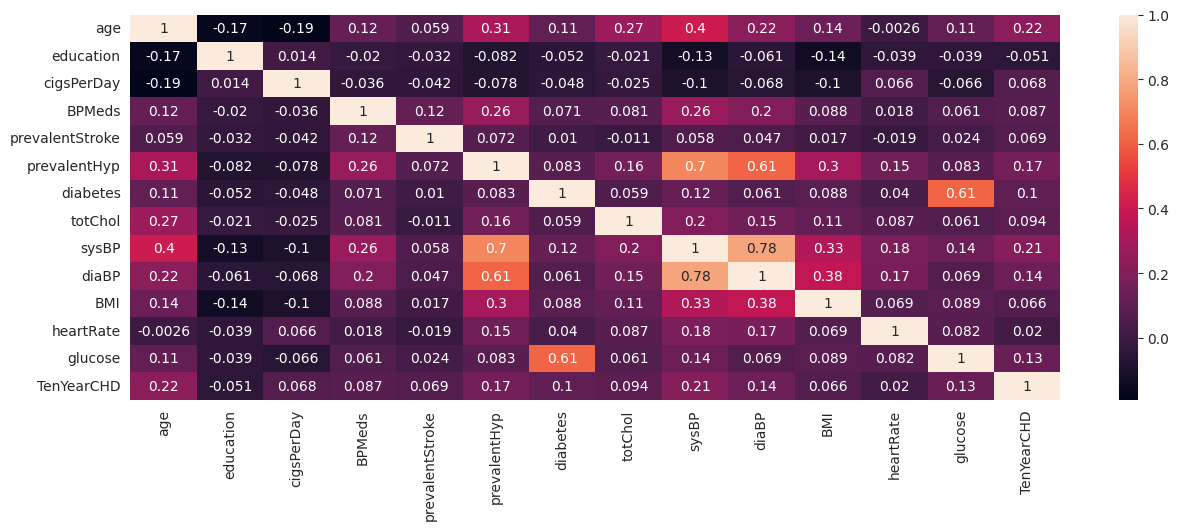

In [31]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot = True)

# Since the data is highly imbalanced before model training and implementation will use a oversampling technique in order to make the data balanced

In [32]:
#Difference between diabetBP and sysBP is PP(PulsePressure)
#Create a new column called 'PulsePressure'
df['PulsePressure'] = df['sysBP'] - df['diaBP']

In [33]:
#Drop sysBP and diaBP
df.drop(['sysBP', 'diaBP'], axis = 1 , inplace = True)

In [34]:
df.drop(['is_smoking'], axis = 1, inplace = True)

In [35]:
df = pd.get_dummies(df, columns = ['sex'])

In [36]:
#value counts of TenYearCHD
# It is our Dependent variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [37]:
#Importing smote
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE()

In [39]:
#Dependent features & Independent features
X = df.drop(['TenYearCHD'] , axis = 1)
y = df['TenYearCHD']

In [40]:
X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,PulsePressure,sex_F,sex_M
0,64,2.0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,63.0,1,0
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,70.0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,45.0,1,0
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,70.0,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,51.5,1,0


In [41]:
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [42]:
#Print the shape of X and y
print(X.shape)
print(y.shape)

(3390, 14)
(3390,)


In [43]:
X,y = smote.fit_resample(X,y)

In [44]:
print(X.shape)
print(y.shape)

(5758, 14)
(5758,)


Now the dataset is balanced and predictions won't get biased

# Feature Scaling

In [45]:
#Normalization
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
#Scaling feature(input feature)
X= scaler.fit_transform(X)

# Train Test Split

In [47]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [48]:
X_train

array([[0.81578947, 1.        , 0.        , ..., 0.26551724, 1.        ,
        0.        ],
       [0.44736842, 0.33333333, 0.04285714, ..., 0.23448276, 0.        ,
        1.        ],
       [0.28947368, 0.        , 0.28571429, ..., 0.16551724, 0.        ,
        1.        ],
       ...,
       [0.94736842, 0.        , 0.        , ..., 0.29775584, 0.        ,
        1.        ],
       [0.44736842, 0.16777615, 0.35666736, ..., 0.28248316, 0.        ,
        1.        ],
       [0.28947368, 0.66666667, 0.07142857, ..., 0.17241379, 1.        ,
        0.        ]])

In [49]:
X_test

array([[0.5       , 0.33333333, 0.        , ..., 0.17241379, 0.        ,
        1.        ],
       [0.60526316, 0.08530853, 0.28571429, ..., 0.29142018, 0.        ,
        0.        ],
       [0.52631579, 0.        , 0.59367635, ..., 0.2445084 , 0.        ,
        1.        ],
       ...,
       [0.78947368, 0.33333333, 0.        , ..., 0.34137931, 0.        ,
        1.        ],
       [0.84210526, 0.        , 0.        , ..., 0.53081289, 1.        ,
        0.        ],
       [0.21052632, 0.33333333, 0.28571429, ..., 0.24137931, 1.        ,
        0.        ]])

# Model Training

# > Logistic Regression

In [50]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
model=LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [55]:
#Model Accuracy
confusion_matrix(y_test,y_pred)

array([[481, 108],
       [202, 361]])

In [56]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 73.09


# > Decision Trees

In [57]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [58]:
m2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
m2.fit(X_train, y_train)
y_pred_dt = m2.predict(X_test)

In [59]:
y_pred_dt

array([0, 1, 1, ..., 1, 1, 0])

In [60]:
accuracy=accuracy_score(y_test,y_pred_dt)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 82.90


# > KNN

In [61]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
m3 = KNeighborsClassifier(n_neighbors=5)
m3.fit(X_train,y_train)
y_pred_knn = m3.predict(X_test)

In [62]:
accuracy=accuracy_score(y_test,y_pred_knn)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 79.86


# > Random Forest Classifier

In [63]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [64]:
m4 = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
m4.fit(X_train,y_train)
y_pred_rf = m4.predict(X_test)

In [65]:
accuracy=accuracy_score(y_test,y_pred_rf)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 90.62


In [66]:
#Confusion Matrix
from sklearn.metrics import classification_report
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", conf_mat)

Confusion Matrix: 
 [[481 108]
 [202 361]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       589
           1       0.77      0.64      0.70       563

    accuracy                           0.73      1152
   macro avg       0.74      0.73      0.73      1152
weighted avg       0.74      0.73      0.73      1152



In [68]:
#Print the final Results w.r.t accuracy
results = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'KNN','Randon Forest Classifier'], 'Score' : [72.66,83.85,80.47, 90.62 ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
90.62,Randon Forest Classifier
83.85,Decision Tree
80.47,KNN
72.66,Logistic Regression


# Conclusion:

Random Forest Classifier is the best model out of all the other models with a model accuracy of 90.62%

Gender, Education and Age are the 3 main influencers


